# Overview

This notebook analyzes relationships between weather and latitude.

# Summary of Results

- Temperature has a correlation of the form temp ~ -latitude^2. The closer a    city is to the equator, the hotter it tends to be
- Most cities are in the northern hemisphere. A random sample of cities resulted in a disproportionate number from the northern hemisphere.
- Cloudiness, Humidity, and wind speed do not have a strong correlation with latitude. One should look for other factors which have a greater effect on these weather features.

## Method
This notebook visualizes the weather in 500+ cities at varying distances from the equator. OpenWeatherMap API is used to gather weather information.

Scatter plots are created to viasualize the relationships between latitude and:
- Temperature
- Humidity
- Cloudiness
- Wind Speed(mph)

A sample of 500 cities is taken from the supported cities list in /Resources/city_list.json


#### Import Dependencies

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from config import API_KEY
from random import sample
import requests
from pprint import pprint
import json
import os
import time

#### Base URL
API documenation available at: https://openweathermap.org/current

In [9]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

### Create List of 500 random cities

In [10]:
#open city list from http://bulk.openweathermap.org/sample/
with open("resources/city_list.json", encoding="utf8") as json_file:
    cities = json.load(json_file)

In [11]:
#sample 500 cities from the list
city_sample = sample(cities, 500)

#Create a list of the randomized city IDs
id_sample = [str(city["id"]) for city in city_sample]
len(id_sample)
print(id_sample[1])
print(id_sample[2])
print(id_sample[3])

5188659
6360150
762684


In [12]:
url = base_url + "id=" + id_sample[138] + "&appid=" + API_KEY + "&units=imperial"
print(url)

http://api.openweathermap.org/data/2.5/weather?id=5881254&appid=95cec0bf6f6b65e569bd219acf7be1f6&units=imperial


### Make sucessive API calls cities in city_sample

In [24]:
name = []
country = []
temperature = []
cloudiness = []
wind_speed = []
lon = []
lat = []
humidity =[]

for id in id_sample:
    #Format URL
    url = base_url + "id=" + id + "&appid=" + API_KEY + "&units=imperial"
    #print(url)

    #Make API call
    response = requests.get(url)
    #print(response.status_code)
    response_json = response.json()
    #pprint(response_json)

    #Store appropriate data from response
    name.append(response_json["name"])
    #print(name)
    country.append(response_json["sys"]["country"])
    #print(country)
    temperature.append(response_json["main"]["temp"])
    humidity.append(response_json["main"]["humidity"])
    #print(temperature)
    cloudiness.append(response_json["clouds"]["all"])
    #print(cloudiness)
    wind_speed.append(response_json["wind"]["speed"])
    #print(wind_speed)
    lon.append(response_json["coord"]["lon"])
    lat.append(response_json["coord"]["lat"])

    #Print a message for each city as it is being processed
    print(f"Processing data for: {name[-1]}, {country[-1]}")
    
    time.sleep(0.5)


Processing data for: Alella, ES
Processing data for: Elverson, US
Processing data for: Villanueva del Rebollar, ES
Processing data for: Pantalowice, PL
Processing data for: Sainte-Foy, FR
Processing data for: The Leap, AU
Processing data for: Algua, IT
Processing data for: Cerna Hora, CZ
Processing data for: Maggotty, JM
Processing data for: Zhishan, CN
Processing data for: Unterboihingen, DE
Processing data for: Grodzisk Mazowiecki, PL
Processing data for: Peguerinos, ES
Processing data for: Freehold, US
Processing data for: Travenhorst, DE
Processing data for: Okhansk, RU
Processing data for: Sedrata, DZ
Processing data for: Blumenthal, DE
Processing data for: Binidayan, PH
Processing data for: Angadanan, PH
Processing data for: Lebanon County, US
Processing data for: Rabanal Viejo, ES
Processing data for: Sapatgram, IN
Processing data for: Atucha, AR
Processing data for: Alekseyevka, RU
Processing data for: Shanhu, CN
Processing data for: Painswick, GB
Processing data for: Leon Vall

Processing data for: Wahlkreis Werdenberg, CH
Processing data for: Aurora, US
Processing data for: Celebration, US
Processing data for: Scundu, RO
Processing data for: Guayuan, CN
Processing data for: Gemeente Asten, NL
Processing data for: Yuxin, CN
Processing data for: Döhlen, DE
Processing data for: Demir Hisar, MK
Processing data for: Freistatt, DE
Processing data for: Ujungpangkah, ID
Processing data for: Seefeld, DE
Processing data for: Siles, ES
Processing data for: Billigheim, DE
Processing data for: Pohorelice, CZ
Processing data for: Edam, NL
Processing data for: Dhone, IN
Processing data for: Wehrheim, DE
Processing data for: Eigeltingen, DE
Processing data for: Maputi, PH
Processing data for: Moosinning, DE
Processing data for: Novyye Lapsary, RU
Processing data for: Sosúa, DO
Processing data for: Respublika Kareliya, RU
Processing data for: Estrela dOeste, BR
Processing data for: Wobbenbüll, DE
Processing data for: Wilaya de Bordj Bou Arréridj, DZ
Processing data for: Piré

Processing data for: Pategi, NG
Processing data for: Dragoni, IT
Processing data for: Biedershausen, DE
Processing data for: Järfälla Kommun, SE
Processing data for: Odemira (São Salvador), PT
Processing data for: Al Fujayr, YE
Processing data for: Orcutt, US
Processing data for: Eschach, DE
Processing data for: Courbevoie, FR
Processing data for: Holzkirchen, DE
Processing data for: Mancha Khiri, TH
Processing data for: Essington, GB
Processing data for: Shendi, SD
Processing data for: Babag, PH
Processing data for: Logan County, US
Processing data for: Soda Springs, US
Processing data for: Meizhuang, CN
Processing data for: San Giorgio a Cremano, IT
Processing data for: Nauheim, DE
Processing data for: Gemeente Roermond, NL
Processing data for: Halsou, FR
Processing data for: Nógrád megye, HU
Processing data for: Ivars d'Urgell, ES
Processing data for: Westensee, DE
Processing data for: Lammi, FI
Processing data for: Kulkwitz, DE
Processing data for: Pleasanton, US
Processing data fo

In [27]:
#create Dataframe
data = {
    "City" : name,
    "Country" : country,
    "Temperature (F)" : temperature,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed (mph)" : wind_speed,
    "Longitude" : lon,
    "Latitude" : lat
}

df = pd.DataFrame(data)
df

,City,Country,Temperature (F),Humidity,Cloudiness,Wind Speed (mph),Longitude,Latitude
0,Alella,ES,64.80,88,0,2.24,2.29,41.49
1,Elverson,US,66.13,100,1,3.36,-75.83,40.16
2,Villanueva del Rebollar,ES,52.77,71,0,5.82,-4.73,42.24
3,Pantalowice,PL,51.76,100,75,6.93,22.44,49.95
4,Sainte-Foy,FR,53.35,100,0,3.36,-1.67,46.55
5,The Leap,AU,83.84,24,98,10.29,149.02,-21.08
6,Algua,IT,67.30,68,75,5.82,9.72,45.83
7,Cerna Hora,CZ,53.24,87,0,2.24,16.58,49.41
8,Maggotty,JM,80.60,83,20,4.70,-77.76,18.16
9,Zhishan,CN,83.10,77,36,2.91,118.33,27.04


In [28]:
#Save data retrieved into csv file
try:
    os.mkdir("Output")
except:
    print("Directory already exists. Overwriting Output/")

df.to_csv("Output/cities_data.csv", index=False)


Directory already exists. Overwriting Output/


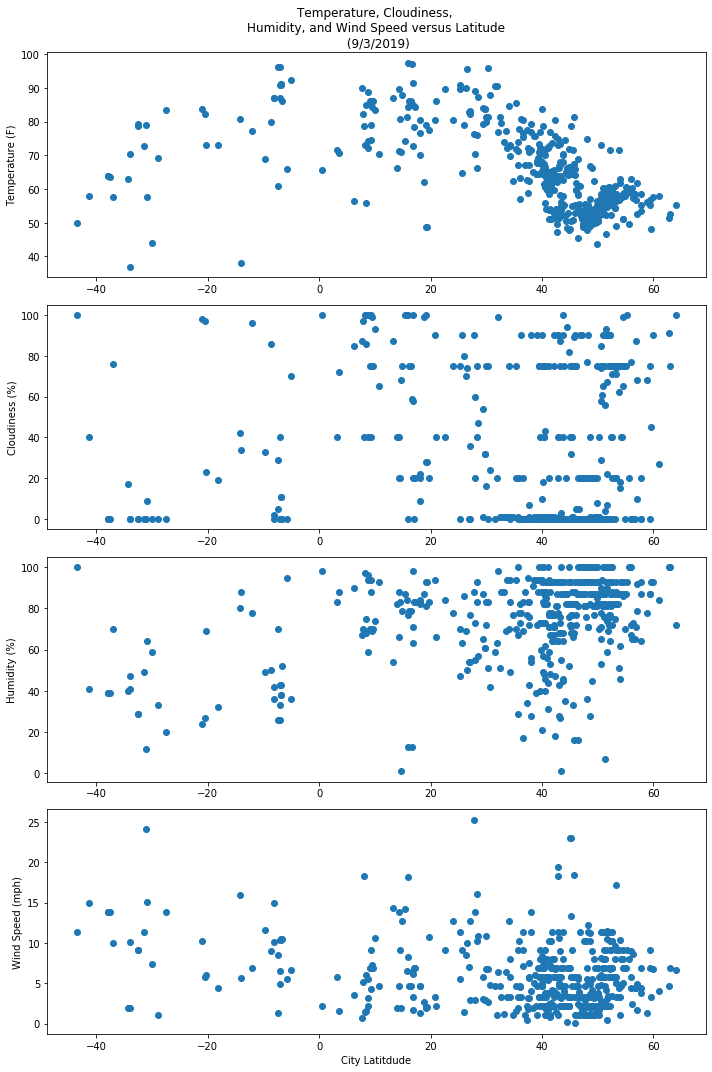

In [45]:
#Create scatter plots with subplot
#df = pd.read_csv("Output/cities_data.csv")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10,15))
ax1.scatter(df["Latitude"], df["Temperature (F)"])
ax2.scatter(df["Latitude"], df["Cloudiness"])
ax3.scatter(df["Latitude"], df["Humidity"])
ax4.scatter(df["Latitude"], df["Wind Speed (mph)"])

ax1.set_title("Temperature, Cloudiness, \nHumidity, and Wind Speed versus Latitude\n (9/3/2019)")
ax4.set_xlabel("City Latitdude")
ax1.set_ylabel("Temperature (F)")
ax2.set_ylabel("Cloudiness (%)")
ax3.set_ylabel("Humidity (%)")
ax4.set_ylabel("Wind Speed (mph)")

plt.tight_layout()
#fig(figsize=(10,10))
#plt.scatter(df["Latitude"], df["Temperature (F)"])
#plt.scatter(df["Latitude"], df["Humidity"])
#plt.scatter(df["Latitude"], df["Cloudiness"])
#plt.scatter(df["Latitude"], df["Wind Speed (mph)"])


In [43]:
#Save image files for each scatter plot
fig.savefig("plots.png")